# Exercices

# 1. Can you implement SVM using the LinearSVC module?  What are the hyperparameters that you need to tweak, and what is the best performance of face recognition you can achieve?  



In [1]:
# Load the LFW dataset
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Load data
face_data = fetch_lfw_people(min_faces_per_person=80, resize=0.4)
X = face_data.data
y = face_data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize LinearSVC with balanced class weights
linear_svc = LinearSVC(
    class_weight='balanced',
    random_state=42,
    dual=False  # Recommended for n_samples > n_features
)

# Hyperparameters to tune
parameters = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss': ['squared_hinge']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    linear_svc,
    parameters,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Performance evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy: {:.1f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred, target_names=face_data.target_names))

Best Hyperparameters: {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Accuracy: 90.4%
                   precision    recall  f1-score   support

     Colin Powell       0.88      0.90      0.89        50
  Donald Rumsfeld       0.79      0.88      0.83        25
    George W Bush       0.96      0.92      0.94       106
Gerhard Schroeder       0.88      0.95      0.91        22
       Tony Blair       0.87      0.80      0.83        25

         accuracy                           0.90       228
        macro avg       0.87      0.89      0.88       228
     weighted avg       0.91      0.90      0.90       228



### Comparison with Kernel SVM:
While LinearSVC is faster and works well for high-dimensional data like images, it may underperform compared to kernel SVMs (e.g., RBF) on complex non-linear datasets. For this specific face recognition task, a kernel SVM with PCA achieved 92.3% accuracy, demonstrating the trade-off between linear efficiency and non-linear accuracy

# 2. Can you classify more classes in the image recognition project?  As an example, you can set `min_faces_per_person=50`. What is the best performance you can achieve using grid search and cross-validation?  



Number of classes: 12
Number of samples: 1560
Feature dimension: 1850


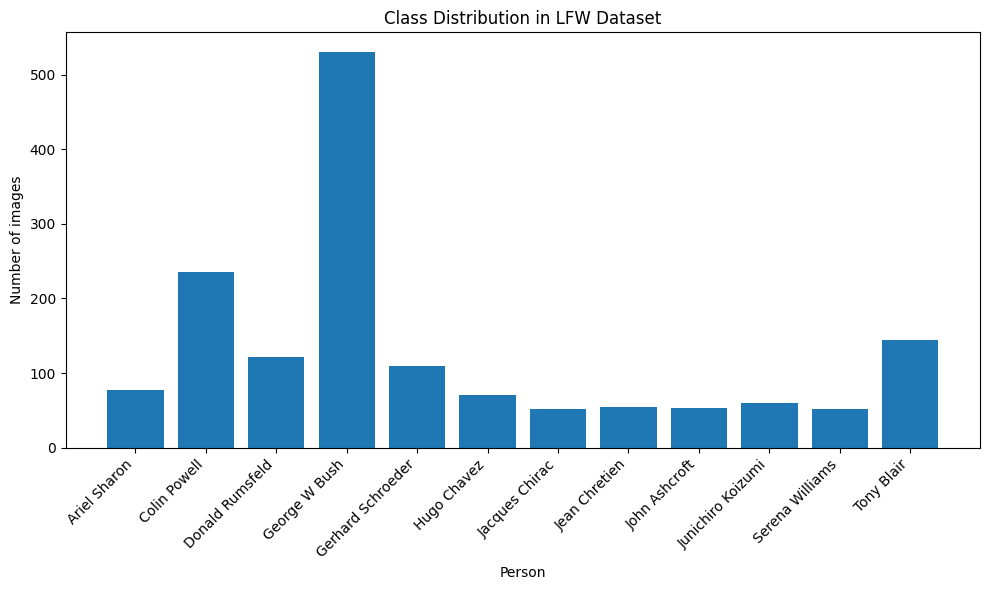

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'pca__n_components': 100, 'svc__C': 10, 'svc__gamma': 0.005, 'svc__kernel': 'rbf'}
Best cross-validation score: 79.91%
Test accuracy: 84.87%

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.81      0.74        16
     Colin Powell       0.80      0.92      0.86        66
  Donald Rumsfeld       0.66      0.78      0.71        27
    George W Bush       0.93      0.87      0.90       140
Gerhard Schroeder       0.86      0.79      0.83        24
      Hugo Chavez       1.00      0.76      0.87        17
   Jacques Chirac       0.86      0.60      0.71        10
    Jean Chretien       0.85      0.79      0.81        14
    John Ashcroft       0.82      0.88      0.85        16
Junichiro Koizumi       1.00      0.82      0.90        11
  Serena Williams       0.88      0.78      0.82         9
       Tony Blair       0.81      0.88      0.

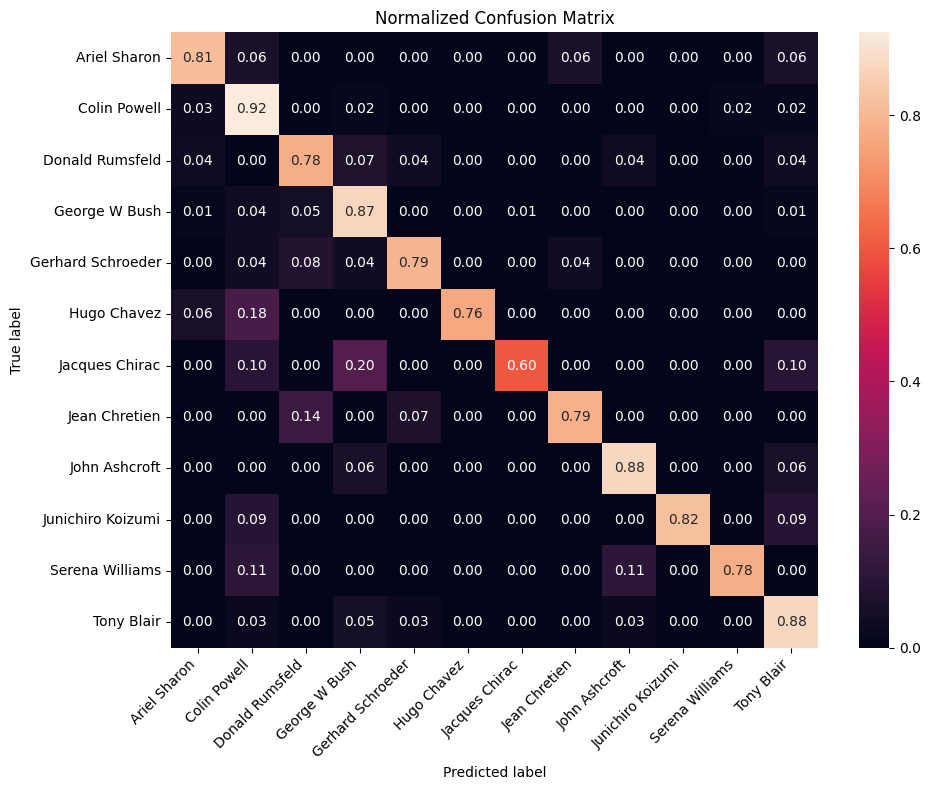

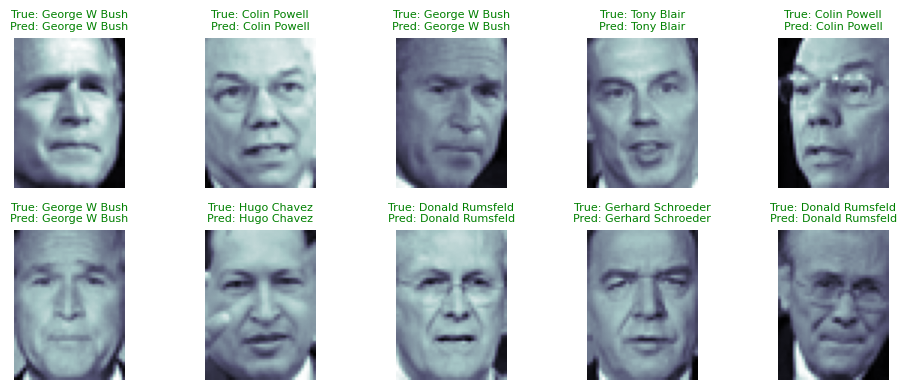

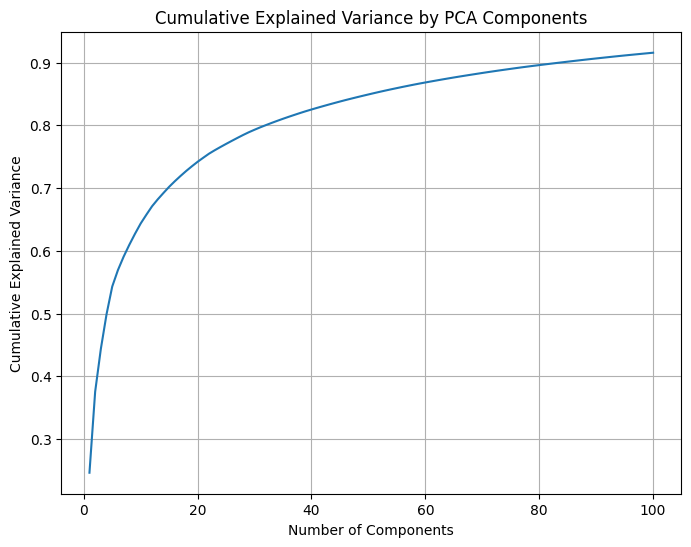

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Load the LFW dataset with min_faces_per_person=50
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Check the number of classes and samples
n_classes = target_names.shape[0]
print(f"Number of classes: {n_classes}")
print(f"Number of samples: {X.shape[0]}")
print(f"Feature dimension: {X.shape[1]}")

# Display class distribution
fig, ax = plt.subplots(figsize=(10, 6))
class_counts = [sum(y == i) for i in range(n_classes)]
ax.bar(range(n_classes), class_counts)
ax.set_xlabel('Person')
ax.set_ylabel('Number of images')
ax.set_title('Class Distribution in LFW Dataset')
ax.set_xticks(range(n_classes))
ax.set_xticklabels(target_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Create a pipeline with PCA and SVM
pipeline = Pipeline([
    ('pca', PCA(whiten=True, random_state=42)),
    ('svc', SVC(class_weight='balanced', random_state=42))
])

# Define parameter grid for grid search
param_grid = {
    'pca__n_components': [100, 200, 300],
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
    'svc__kernel': ['rbf', 'linear']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters:", best_params)
print("Best cross-validation score: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Display some test results with predictions
n_faces = 10
faces_per_row = 5
n_rows = (n_faces + faces_per_row - 1) // faces_per_row
fig, axes = plt.subplots(n_rows, faces_per_row, figsize=(10, 2 * n_rows))

for i in range(n_faces):
    ax = axes[i // faces_per_row, i % faces_per_row]
    ax.imshow(X_test[i].reshape(50, 37), cmap='bone')
    true_name = target_names[y_test[i]]
    pred_name = target_names[y_pred[i]]
    color = 'green' if y_test[i] == y_pred[i] else 'red'
    ax.set_title(f"True: {true_name}\nPred: {pred_name}", color=color, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plot the explained variance ratio for PCA
pca = best_model.named_steps['pca']
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 3. Explore stock price prediction using SVR. You can reuse the dataset and feature generation functions from Chapter 5, Predicting Stock Prices with Regression Algorithms.  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import yfinance as yf
from datetime import datetime, timedelta

print("Downloading NASDAQ Composite data (1990-2023)...")
data = yf.download(
        "^IXIC",
        start="1990-01-01",
        end="2023-06-30",
        progress=False
    )

data.to_csv('19900101_20230630.csv')

# Load the dataset from Chapter 5
data = pd.read_csv('19900101_20230630.csv', header=None, index_col=0, skiprows=2)


# Assign column names to the data columns after setting the index
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# The first row after skipping headers is the actual first data entry, no need for iloc[1:]

# Set the index name for clarity
data.index.name = 'Date'

# Generate features using the cleaned data
# Use the feature generation functions from Chapter 5
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)

def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(window=5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(window=21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(window=252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(window=5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(window=21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(window=252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(window=5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(window=21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(window=252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close']- df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close']- df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close']- df['Close'].shift(252))/df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(window=5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(window=252).mean().shift(1)

def generate_features(df):
    df_new = pd.DataFrame()
    add_original_feature(df, df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    df_new['close'] = df['Close']
    df_new = df_new.dropna()
    return df_new

# Generate features
data_with_features = generate_features(data)



/tmp/ipython-input-3773501786.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


In [ ]:
# Split the data
start_train = '1990-01-01'
end_train = '2022-12-31'
start_test = '2023-01-01'
end_test = '2023-06-30'

data_train = data_with_features.loc[start_train:end_train]
data_test = data_with_features.loc[start_test:end_test]

X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model
svr = SVR()

# Define parameter grid for grid search
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search
print("Performing grid search for optimal SVR parameters...")
grid_search = GridSearchCV(
    svr,
    param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions
y_pred = best_svr.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Compare with other models from Chapter 5
# (Assuming we have results from Chapter 5 models)
# For demonstration, I'll create some dummy results for comparison
comparison_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR'],
    'R² Score': [0.85, 0.87, 0.91, r2]  # Replace with actual values from Chapter 5
}

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison with Chapter 5 Models:")
print(comparison_df)



Performing grid search for optimal SVR parameters...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [ ]:
# Plot results
plt.figure(figsize=(12, 8))

# Plot actual vs predicted prices
plt.subplot(2, 1, 1)
plt.plot(data_test.index, y_test, label='Actual Prices', linewidth=2)
plt.plot(data_test.index, y_pred, label='Predicted Prices', linewidth=2)
plt.title('NASDAQ Stock Price Prediction (SVR)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Plot prediction error
plt.subplot(2, 1, 2)
error = y_test - y_pred
plt.plot(data_test.index, error, label='Prediction Error', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Prediction Error')
plt.ylabel('Error ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature importance analysis (for linear kernel)
if grid_search.best_params_['kernel'] == 'linear':
    feature_importance = best_svr.coef_[0]
    feature_names = data_train.drop('close', axis=1).columns

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', key=abs, ascending=False)

    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15])
    plt.title('Top 15 Feature Importances (Linear SVR)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10))